## 4.1 グラフ理論入門

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

### 無向グラフ

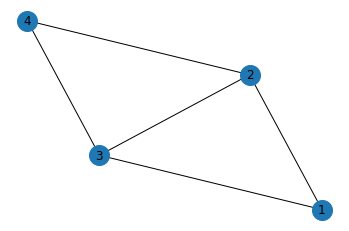

In [2]:
G = nx.Graph()
vlist =[1, 2, 3, 4]
elist = [(1,2), (1,3), (2,3), (2,4), (3,4)]
G.add_nodes_from(vlist)
G.add_edges_from(elist)
nx.draw_networkx(G, nodex_color='lightgray', node_size=400)
plt.axis('off')
plt.show()

In [3]:
print('Gの頂点のリスト:', G.nodes())
print('Gの頂点の数:', G.number_of_nodes())
print('Gの頂点:1に隣接する頂点のリスト:',
             [v for v in nx.all_neighbors(G,1)])

Gの頂点のリスト: [1, 2, 3, 4]
Gの頂点の数: 4
Gの頂点:1に隣接する頂点のリスト: [2, 3]


### 有向グラフ

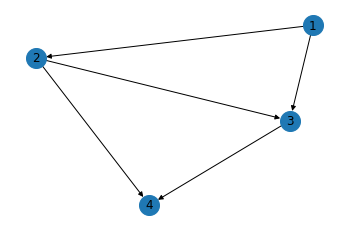

In [4]:
DG = nx.DiGraph()
vlist =[1, 2, 3, 4]
elist = [(1,2), (1,3), (2,3), (2,4), (3,4)]
DG.add_nodes_from(vlist)
DG.add_edges_from(elist)
nx.draw_networkx(DG, nodex_color='lightgray', node_size=400)
plt.axis('off')
plt.show()

In [5]:
print('DGの枝のリスト:', DG.edges())
print('DGの枝の数:', DG.number_of_edges())

DGの枝のリスト: [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]
DGの枝の数: 5


## 隣接行列 (adjacency matrix) と接続行列 (incidence matrix)

### 無向グラフ

In [6]:
G = nx.MultiGraph()
G.add_edges_from([(1,2), (1,3), (3,1), (2,3), (2,2)])
A = nx.adjacency_matrix(G)
M = nx.incidence_matrix(G)
print('A =')
print(A.toarray())
print('M =')
print(M.toarray())

A =
[[0 1 2]
 [1 1 1]
 [2 1 0]]
M =
[[1. 1. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 1. 1. 0.]]


### 有向グラフ

In [7]:
G = nx.MultiDiGraph()
G.add_edges_from([(1,2), (1,3), (3,1), (2,3), (2,3), (2,2)])
A = nx.adjacency_matrix(G)
M = nx.incidence_matrix(G, oriented=True)
print('A =')
print(A.toarray())
print('M =')
print(M.toarray())

A =
[[0 1 1]
 [0 1 2]
 [1 0 0]]
M =
[[-1. -1.  0.  0.  0.  1.]
 [ 1.  0. -1. -1.  0.  0.]
 [ 0.  1.  1.  1.  0. -1.]]


## 完全グラフ
どの頂点間も枝で隣接しているグラフ

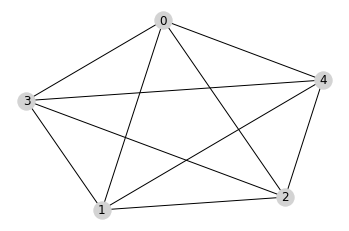

In [8]:
G = nx.complete_graph(5)
p = nx.spring_layout(G, iterations=100)
nx.draw_networkx(G, pos=p, node_color='lightgray', node_size=300)
plt.axis('off')
plt.show()

### 完全2部グラフ
グラフの頂点集合Vが2つの部分集合XとYに分割され、どの枝もXとYの点両方に接続しているとき、そのグラフを2部グラフ (bipartite graph)といい、XとYのどの頂点間にも枝が存在するとき、完全2部グラフという。

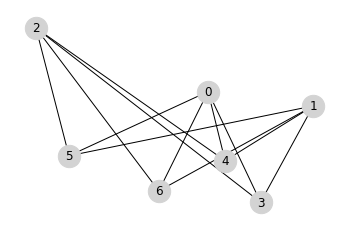

In [9]:
m, n = 3, 4
G = nx.complete_bipartite_graph(m, n)
nx.draw_networkx(G, pos=nx.random_layout(G),
                 node_color='lightgray', node_size=500)
plt.axis('off')
plt.show()

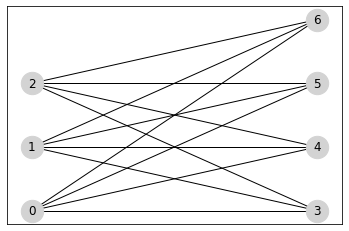

In [10]:
p = {}
for i in range(m):
    p[i] = (0, i)
for i in range(n):
    p[m+i] = (1, i)
nx.draw_networkx(G, pos=p, node_color='lightgray', node_size=500)

### サイクルグラフ (cycle graph)

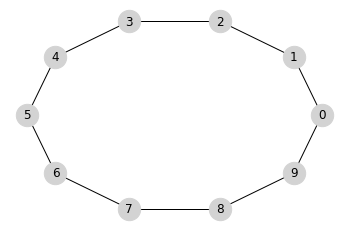

In [11]:
G = nx.cycle_graph(range(10))
nx.draw_networkx(G, pos=nx.circular_layout(G),
                 node_color='lightgray', node_size=500)
plt.axis('off')
plt.show()

### 星グラフ (star graph)

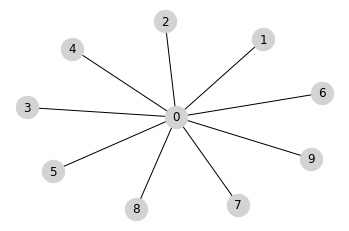

In [12]:
G = nx.star_graph(range(10))
nx.draw_networkx(G, pos=nx.spring_layout(G),
                 node_color='lightgray', node_size=500)
plt.axis('off')
plt.show()

### 車輪グラフ (wheel graph)

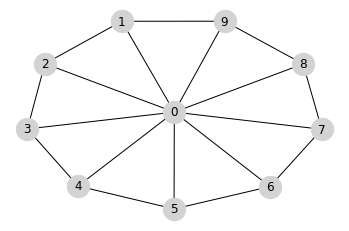

In [13]:
G = nx.wheel_graph(range(10))
nx.draw_networkx(G, pos=nx.spring_layout(G),
                 node_color='lightgray', node_size=500)
plt.axis('off')
plt.show()

### 格子グラフ

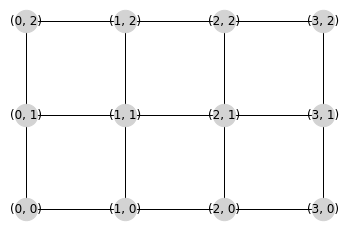

In [14]:
GR = nx.grid_2d_graph(4, 3)
pos = {v:v for v in GR.nodes()}
nx.draw_networkx(GR, pos=pos,
                 node_color='lightgray', node_size=500)
plt.axis('off')
plt.show()

### k立方体グラフ (k-hypercube graph)

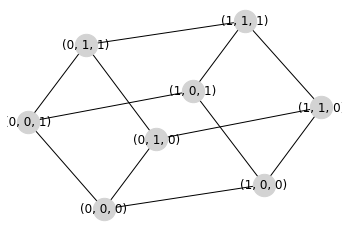

In [15]:
G = nx.nx.hypercube_graph(3)
nx.draw_networkx(G, pos=nx.spring_layout(G),
                 node_color='lightgray', node_size=500)
plt.axis('off')
plt.show()

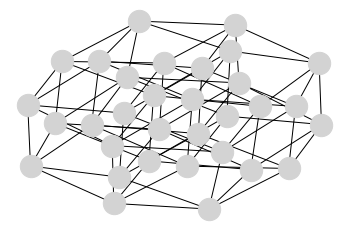

In [16]:
G = nx.nx.hypercube_graph(5)
nx.draw_networkx(G, pos=nx.spring_layout(G),
                 node_color='lightgray', node_size=500,
                 with_labels=False)
plt.axis('off')
plt.show()

### 次数 (degree)

In [17]:
G = nx.random_geometric_graph(100, 0.1)

print('次数の合計:', sum(nx.degree(G,v) for v in G.nodes()))
print('枝の数の2倍:', 2*len(G.edges()))
print('奇点の数:', len([v for v in G.nodes() if nx.degree(G,v)%2 == 1]))

次数の合計: 318
枝の数の2倍: 318
奇点の数: 42


### 同型性 (isomorphic)

In [18]:
G1 = nx.Graph()
G1.add_edges_from([(1,4), (1,5), (1,6), (2,4), (2,5),
                   (2,6), (3,4), (3,5), (4,6)])

G2 = nx.Graph()
G2.add_edges_from([('a','b'), ('a','d'), ('a','f'), ('b','c'),
                   ('a','e'), ('c','d'), ('c','f'), ('d','e'), ('e','f')])

G3 = nx.Graph()
G3.add_edges_from([('x','z'), ('x','y'), ('y','z'), ('x','u'),
                   ('y','v'), ('z','w'), ('u','v'), ('v','w'), ('w','u')])

print(nx.is_isomorphic(G1, G2))
print(nx.is_isomorphic(G1, G3))

True
False


### 部分グラフ (subgraph)

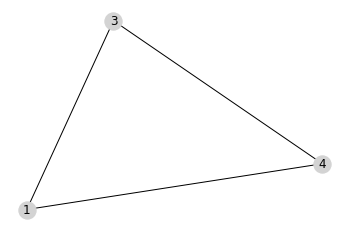

In [19]:
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (1,4), (2,4), (3,4)])
G1 = G.subgraph((1, 3, 4))
nx.draw_networkx(G1, node_color='lightgray')
plt.axis('off')
plt.show()

## 連結(connected)なグラフ
非連結なグラフを連結成分に分解することを連結成分分解 (connected component decomposition)という。

In [20]:
G = nx.path_graph(4)
nx.add_path(G, [10, 11, 12])
print(nx.is_connected(G))
for c in nx.connected_components(G):
    print(c)

False
{0, 1, 2, 3}
{10, 11, 12}
